# Chapter 10 - Introduction to Artifical Neural Networks with Keras

This notebook contains my own implementations of code and examples in chapter 10

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn >= 0.20 and Tensorflow >= 2.0

In [1]:
# Python >= 3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn >=0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow >=0.2 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="$internal gelsd")

# Perceptrons

**Note:** we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in fugure versions of Scikit-Learn

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] #petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1])

Saving figure perceptron_iris_plot


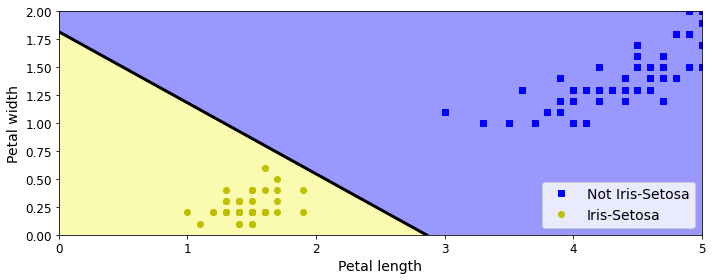

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 500).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a* axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize =14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()


# Activation functions

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


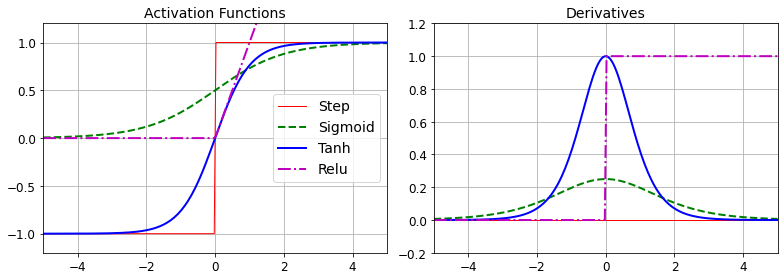

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="Relu")
plt.grid(True)
plt.legend(loc='center right', fontsize=14)
plt.title("Activation Functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="Relu")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

### Multilayer Perceptrol (MLP) for the XOR problem

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

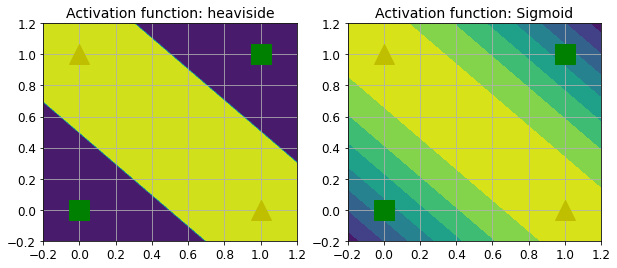

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: Sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
tf.__version__

'2.5.0'

In [12]:
keras.__version__

'2.5.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels

In [14]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255)

In [16]:
X_train_full.dtype

dtype('uint8')

In [17]:
y_train_full.dtype

dtype('uint8')

In [18]:
np.unique(X_train_full)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0 to 1 range and convert them to floats, by dividing by 255.0

In [19]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

The labels are the class IDs (represented as uint8), from 0 to 9

In [20]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Here are the corresponding class names:

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [22]:
class_names[y_train[0]]

'Coat'

You can plot an image using Matplotlib's `imshow()` function with a `binary` color map:

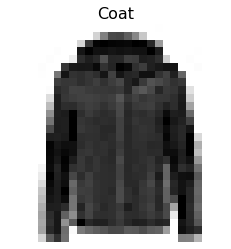

In [23]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.title(class_names[y_train[0]], fontsize=16)
plt.show()

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [24]:
X_valid.shape

(5000, 28, 28)

In [25]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

In [26]:
def plot_fashion(items, classes, n_rows = 4, n_cols = 10):
    #assert items.shape[0] >= (n_rows * n_cols)
    #assert items.shape[0] == classes.shape[0]
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = row * n_cols + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(items[index], cmap='binary')
            plt.axis('off')
            plt.title(classes[index], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()
            

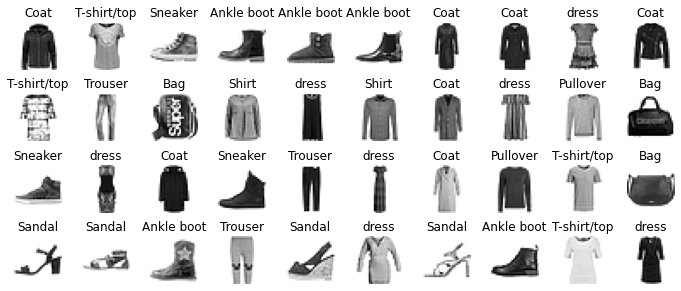

Saving figure fashion_mnist_plot


<Figure size 432x288 with 0 Axes>

In [27]:
plot_fashion(X_train[:40], [class_names[c] for c in y_train[:40]])
save_fig('fashion_mnist_plot', tight_layout=False)

## Building a model using the Sequential API

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [29]:
model.layers

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.layers

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


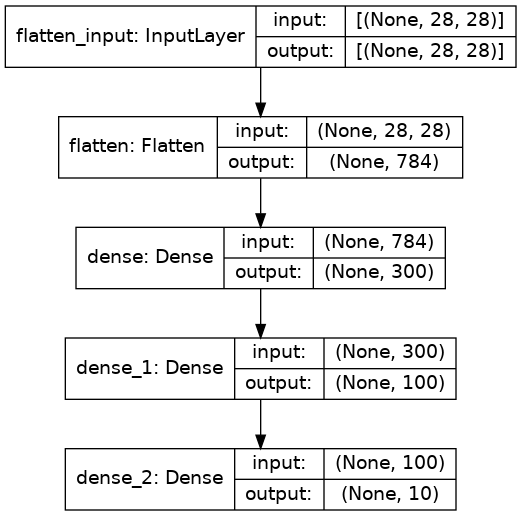

In [34]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [35]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [36]:
model.get_layer(hidden1.name) is hidden1

True

In [37]:
weights, biases = hidden1.get_weights()

In [38]:
weights.shape

(784, 300)

In [39]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [40]:
biases.shape

(300,)

In [41]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [43]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [44]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid),
                    batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.5310 - val_accuracy: 0.7986
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4126 - accuracy: 0.8566 - val_loss: 0.3918 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3941 - accuracy: 0.8621 - val_loss: 0.3750 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3753 - accuracy: 0.8677 - val_loss: 0.3705 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3634 - accuracy: 0.8715 - val_loss: 0.3624 - val_accuracy:

In [45]:
history

In [46]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [47]:
type(history.history)


dict

In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

Saving figure keras_learning_curves_plot


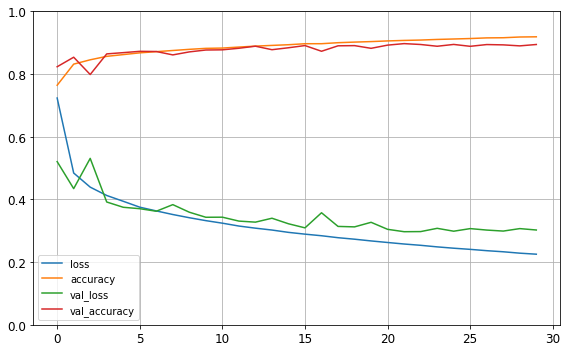

In [50]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8822


[0.3365437388420105, 0.8822000026702881]

In [52]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [53]:
y_pred = model.predict_classes(X_new)
y_pred

/home/asalaheddin/miniconda3/envs/tf-new/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [54]:
y_pred = (model.predict(X_new) > 0.5).astype("int32")
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [55]:
y_pred = np.argmax(model.predict(X_new), axis = 1)
y_pred

array([9, 2, 1])

In [56]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [57]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

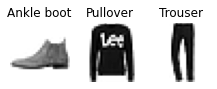

Saving figure fashion_mnist_images_plot


<Figure size 432x288 with 0 Axes>

In [58]:
plot_fashion(X_new, np.array(class_names)[y_pred], n_rows = 1, n_cols =3)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [60]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.6419 - val_loss: 0.8077
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7047 - val_loss: 0.6736
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6345 - val_loss: 0.6243
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5977 - val_loss: 0.5977
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5706 - val_loss: 0.5708
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5472 - val_loss: 0.5538
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5288 - val_loss: 0.5370
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5130 - val_loss: 0.5257
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4992 - val_loss: 0.5142
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4875 - val_loss: 0.5040

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


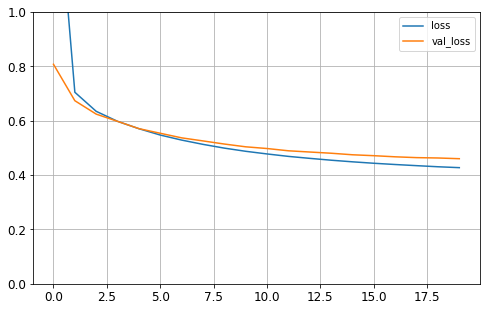

In [63]:
pd.DataFrame(history.history).plot(figsize=(8 ,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [65]:
y_pred

array([[0.32761043],
       [1.7185787 ],
       [3.3415678 ]], dtype=float32)

In [66]:
y_new = y_test[:3]
y_new

array([0.477  , 0.458  , 5.00001])

In [67]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4190


0.4190308451652527

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
X_train.shape[1:]

(8,)

In [70]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_3[0][0]                

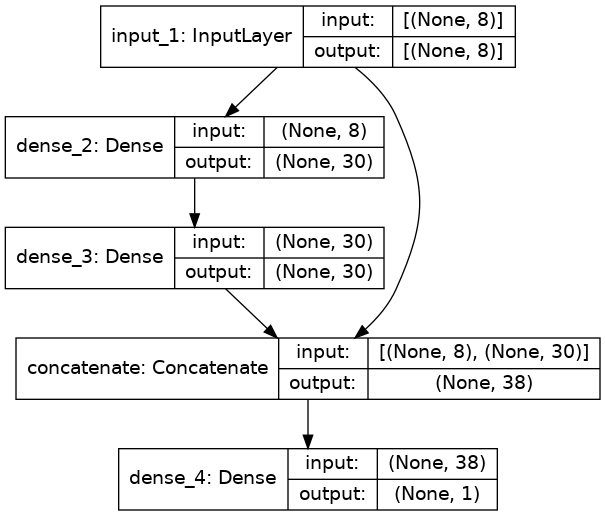

In [72]:
keras.utils.plot_model(model, show_shapes=True)

In [73]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1.e-3))
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 1.2611 - val_loss: 0.7115
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6580 - val_loss: 0.6351
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5878 - val_loss: 0.5926
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5582 - val_loss: 0.5727
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5347 - val_loss: 0.5501
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5158 - val_loss: 0.5337
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5002 - val_loss: 0.5209
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4876 - val_loss: 0.5110
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4760 - val_loss: 0.4997
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4659 - val_loss: 0.4907

In [74]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 2ms/step - loss: 0.4122


In [75]:
y_pred

array([[0.39197966],
       [1.9343443 ],
       [3.692161  ]], dtype=float32)

In [76]:
y_new

array([0.477  , 0.458  , 5.00001])

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3, and 4)

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [79]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8145 - val_loss: 0.8058
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6771 - val_loss: 0.6472
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5979 - val_loss: 0.5949
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5584 - val_loss: 0.5758
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5334 - val_loss: 0.5498
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5120 - val_loss: 0.5382
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4970 - val_loss: 0.5231
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4843 - val_loss: 0.5140
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4730 - val_loss: 0.5078
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4644 - val_loss: 0.4974

In [80]:
y_pred

array([[0.25782728],
       [2.0102234 ],
       [3.715849  ]], dtype=float32)

In [81]:
y_new

array([0.477  , 0.458  , 5.00001])

### Adding an auxiliary output for regularization:

In [82]:
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], 
                           outputs=[output, aux_output])

In [84]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [85]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.0637 - val_main_output_loss: 0.8428 - val_aux_output_loss: 3.0523
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 0.8088 - val_main_output_loss: 0.6640 - val_aux_output_loss: 2.1118
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 0.7181 - val_main_output_loss: 0.6067 - val_aux_output_loss: 1.7205
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 0.6805 - val_main_output_loss: 0.5852 - val_aux_output_loss: 1.5382
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss

In [86]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 3ms/step - loss: 0.4752 - main_output_loss: 0.4278 - aux_output_loss: 0.9021


In [87]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

In [88]:
y_pred_main

array([[0.2457022],
       [2.035963 ],
       [3.630814 ]], dtype=float32)

In [89]:
y_pred_aux

array([[0.9160143],
       [1.9416032],
       [2.64835  ]], dtype=float32)

In [90]:
y_new

array([0.477  , 0.458  , 5.00001])

# The subclassing API

In [91]:
class WideAndDeep(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeep(30, activation="relu")

In [92]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                   validation_data=([X_valid_A, X_valid_B], (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 1.1282 - val_output_1_loss: 1.0043 - val_output_2_loss: 2.2438
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 0.8753 - val_output_1_loss: 0.7735 - val_output_2_loss: 1.7918
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 0.7911 - val_output_1_loss: 0.7003 - val_output_2_loss: 1.6079
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 0.7445 - val_output_1_loss: 0.6603 - val_output_2_loss: 1.5025
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 0.7090 - val_output_1_loss: 0.6284 - val_ou

In [93]:
model.summary()

Model: "wide_and_deep"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  210       
_________________________________________________________________
dense_10 (Dense)             multiple                  930       
_________________________________________________________________
dense_11 (Dense)             multiple                  36        
_________________________________________________________________
dense_12 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


# Saving and Restoring

In [94]:
np.random.seed(42)
tf.random.set_seed(42)

In [95]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [96]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 1.8866 - val_loss: 0.7414
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6577 - val_loss: 0.6221
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5934 - val_loss: 0.5779
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5557 - val_loss: 0.5572
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5272 - val_loss: 0.5305
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5033 - val_loss: 0.5113
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4854 - val_loss: 0.4974
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4709 - val_loss: 0.4903
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4578 - val_loss: 0.4773
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4356


In [97]:
model.save("my_keras_model.h5")

In [98]:
model = keras.models.load_model("my_keras_model.h5")

In [99]:
model.predict(X_new)

array([[0.47364497],
       [1.6739203 ],
       [3.1427917 ]], dtype=float32)

In [100]:
model.save_weights("my_keras_weights.ckpt")

In [101]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [102]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [103]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [104]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=40,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") #rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/40
363/363 [==============================] - 1s 4ms/step - loss: 1.8866 - val_loss: 0.7414
Epoch 2/40
363/363 [==============================] - 1s 4ms/step - loss: 0.6577 - val_loss: 0.6221
Epoch 3/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5934 - val_loss: 0.5779
Epoch 4/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5557 - val_loss: 0.5572
Epoch 5/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5272 - val_loss: 0.5305
Epoch 6/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5033 - val_loss: 0.5113
Epoch 7/40
363/363 [==============================] - 1s 4ms/step - loss: 0.4854 - val_loss: 0.4974
Epoch 8/40
363/363 [==============================] - 1s 4ms/step - loss: 0.4709 - val_loss: 0.4903
Epoch 9/40
363/363 [==============================] - 1s 4ms/step - loss: 0.4578 - val_loss: 0.4773
Epoch 10/40
363/363 [==============================] - 1s 4ms/step - loss: 0.4474 - val_loss: 0.4696

In [105]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3601 - val_loss: 0.4133
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3591 - val_loss: 0.4140
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3581 - val_loss: 0.4135
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3573 - val_loss: 0.4119
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3563 - val_loss: 0.4121
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3554 - val_loss: 0.4120
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3546 - val_loss: 0.4124
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3538 - val_loss: 0.4116
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3531 - val_loss: 0.4113
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3523 - val_lo

In [106]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [107]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=5,
                   validation_data=(X_valid, y_valid),
                   callbacks=[val_train_ratio_cb])

Epoch 1/5
363/363 [==============================] - 1s 4ms/step - loss: 0.3311 - val_loss: 0.4056

val/train: 1.23
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.3311 - val_loss: 0.4032

val/train: 1.22
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.3303 - val_loss: 0.4059

val/train: 1.23
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.3303 - val_loss: 0.4027

val/train: 1.22
Epoch 5/5
363/363 [==============================] - 1s 4ms/step - loss: 0.3298 - val_loss: 0.4050

val/train: 1.23


# TensorBoard

In [108]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [109]:
print(root_logdir)

./my_logs


In [110]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_06_13-07_08_53'

In [111]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [112]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [113]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model.fit(X_train, y_train, epochs=30,
          validation_data=(X_valid, y_valid),
          callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - val_loss: 0.7414
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6577 - val_loss: 0.6221
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5934 - val_loss: 0.5779
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5557 - val_loss: 0.5572
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5272 - val_loss: 0.5305
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5033 - val_loss: 0.5113
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4854 - val_loss: 0.4974
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4709 - val_loss: 0.4903
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4578 - val_loss: 0.4773
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4474 - val_loss: 0.4696

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebooks' directly, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Juypter extension and run it like this:

In [114]:
%reload_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [115]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2021_06_13-07_09_36'

In [116]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [117]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [118]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5530 - val_loss: 3.4409
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================] 

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [119]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [120]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [121]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [122]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [123]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.0896 - val_loss: 0.8275
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7606 - val_loss: 0.6074
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5456 - val_loss: 0.5189
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4732 - val_loss: 0.4983
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4503 - val_loss: 0.4779
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4338 - val_loss: 0.4677
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4241 - val_loss: 0.4609
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4168 - val_loss: 0.4580
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4108 - val_loss: 0.4497
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4060 - val_lo

In [124]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3718


In [126]:
y_pred = keras_reg.predict(X_new)
y_pred

array([0.6468799, 1.6422875, 4.7728605], dtype=float32)

In [127]:
y_new

array([0.477  , 0.458  , 5.00001])

In [128]:
np.random.seed(42)
tf.random.set_seed(42)

In [134]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)],
                 )

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 1.1055 - val_loss: 0.6292
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5631 - val_loss: 0.5423
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4659 - val_loss: 0.4812
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4169 - val_loss: 0.4451
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3806 - val_loss: 0.4351
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3672 - val_loss: 0.4363
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3589 - val_loss: 0.4309
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3520 - val_loss: 0.4306
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3474 - val_loss: 0.4360
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f8b825d1850>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8c0693dfa0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   verbose=2)

In [136]:
rnd_search_cv.best_params_

{'learning_rate': 0.006441187893068639, 'n_hidden': 3, 'n_neurons': 86}

In [137]:
rnd_search_cv.best_score_

-0.3074430028597514

In [138]:
rnd_search_cv.best_estimator_

In [139]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3739


-0.37388765811920166

In [140]:
model = rnd_search_cv.best_estimator_.model
model

In [141]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3739


0.37388765811920166

# Exercise solutions

## 10.

## Load the MNIST dataset

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.backend.clear_session()

In [4]:
mnist = keras.datasets.mnist

In [5]:
type(mnist)

module

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, 
                                                          test_size=5000, stratify=y_train_full)

In [10]:
X_train.shape

(55000, 28, 28)

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
def plot_fashion(numbers, classes, n_rows = 4, n_cols = 10):
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = row * n_cols + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(numbers[index], cmap='binary')
            plt.axis('off')
            plt.title(classes[index], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

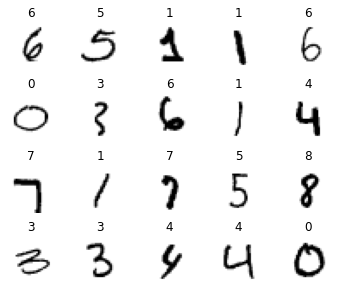

In [13]:
plot_fashion(X_train[:20, :], y_train[:20], n_rows=4, n_cols=5)

## TensorBoard

In [14]:
root_logdir = os.path.join(os.curdir, "mnist_keras_logs")

In [102]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./mnist_keras_logs/run_2021_06_15-22_49_48'

In [16]:
def lr_scheduler(epoch, lr):
    return lr * 1.01862903491573

In [17]:
check_point_cb = keras.callbacks.ModelCheckpoint("keras_mnist_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
grow_lr_cb = keras.callbacks.LearningRateScheduler(lr_scheduler)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

## Train without early stopping and with learning rate scheduler

In [18]:
n_neurons = 500

model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(n_neurons, activation="relu"),
    keras.layers.Dense(n_neurons, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-5), metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=500, batch_size=1000,
                   validation_data=(X_valid, y_valid),
                   callbacks=[check_point_cb, grow_lr_cb, tensorboard_cb])

Epoch 1/500
55/55 [==============================] - 1s 13ms/step - loss: 51.3653 - accuracy: 0.1929 - val_loss: 34.0822 - val_accuracy: 0.2696
Epoch 2/500
55/55 [==============================] - 0s 4ms/step - loss: 27.3187 - accuracy: 0.3415 - val_loss: 22.2545 - val_accuracy: 0.4066
Epoch 3/500
55/55 [==============================] - 0s 4ms/step - loss: 19.1173 - accuracy: 0.4592 - val_loss: 16.9188 - val_accuracy: 0.4986
Epoch 4/500
55/55 [==============================] - 0s 4ms/step - loss: 15.1201 - accuracy: 0.5386 - val_loss: 13.9942 - val_accuracy: 0.5642
Epoch 5/500
55/55 [==============================] - 0s 4ms/step - loss: 12.7702 - accuracy: 0.5920 - val_loss: 12.1261 - val_accuracy: 0.6078
Epoch 6/500
55/55 [==============================] - 0s 4ms/step - loss: 11.2071 - accuracy: 0.6303 - val_loss: 10.8379 - val_accuracy: 0.6368
Epoch 7/500
55/55 [==============================] - 0s 4ms/step - loss: 10.0702 - accuracy: 0.6589 - val_loss: 9.8611 - val_accuracy: 0.6628

## Final Network

In [134]:
keras.backend.clear_session()

In [141]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=2e-3), metrics=["accuracy"])

run_logdir = get_run_logdir() + "_final"

In [ ]:
check_point_cb = keras.callbacks.ModelCheckpoint("keras_mnist_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
grow_lr_cb = keras.callbacks.LearningRateScheduler(lr_scheduler)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=500, batch_size=16,
                   validation_data=(X_valid, y_valid),
                   callbacks=[check_point_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/500
3438/3438 [==============================] - 12s 4ms/step - loss: 1.3373 - accuracy: 0.8688 - val_loss: 0.2852 - val_accuracy: 0.9238
Epoch 2/500
3438/3438 [==============================] - 12s 3ms/step - loss: 0.2046 - accuracy: 0.9405 - val_loss: 0.2165 - val_accuracy: 0.9410
Epoch 3/500
3438/3438 [==============================] - 12s 3ms/step - loss: 0.1478 - accuracy: 0.9562 - val_loss: 0.1858 - val_accuracy: 0.9474
Epoch 4/500
3438/3438 [==============================] - 12s 3ms/step - loss: 0.1164 - accuracy: 0.9643 - val_loss: 0.1602 - val_accuracy: 0.9556
Epoch 5/500
3438/3438 [==============================] - 12s 3ms/step - loss: 0.0953 - accuracy: 0.9708 - val_loss: 0.1623 - val_accuracy: 0.9576
Epoch 6/500
3438/3438 [==============================] - 12s 3ms/step - loss: 0.0803 - accuracy: 0.9748 - val_loss: 0.1509 - val_accuracy: 0.9640
Epoch 7/500
3438/3438 [==============================] - 12s 3ms/step - loss: 0.0673 - accuracy: 0.9788 - val_loss: 0.1541 -

In [130]:
model = keras.models.load_model("keras_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2734 - accuracy: 0.9485


[0.2734074592590332, 0.9484999775886536]